# Redes Neuronales - TP2
## Ej 3

Implemente un perceptrón multicapa que aprenda la función lógica XOR de 2 y de 4
entradas (utilizando el algoritmo Backpropagation y actualizando en batch). Muestre
cómo evoluciona el error durante el entrenamiento.

In [122]:
import numpy as np
import matplotlib.pyplot as plt

In [123]:
class perceptron_multicapa:
    def __init__(self, capas, dim_entrada):
        self.capas = capas
        self.dim_entrada = dim_entrada
        self.lista_matrices = []
        self.lr = None
        entrada_anterior = dim_entrada
        for num_perceptrones in capas:
            matriz_pesos = np.random.uniform(-2, 2, size=(num_perceptrones, entrada_anterior + 1)) # inicialización más amplia
            self.lista_matrices.append(matriz_pesos)
            entrada_anterior = num_perceptrones

    def funcion_activacion(self, x):
        return 1 / (1 + np.exp(-x))
    
    def derivada_activacion(self, a):
        return a * (1 - a)

    def forward(self, x):
        a = x
        activaciones = [a]
        zs = []
        for W in self.lista_matrices:
            a_b = np.concatenate(([1], a))
            z = np.dot(W, a_b)
            zs.append(z)
            a = self.funcion_activacion(z)
            activaciones.append(a)
        return activaciones, zs
    
    def predecir(self, X):
        salidas = []
        for x in X:
            a = x
            for W in self.lista_matrices:
                a = np.concatenate(([1], a))
                a = self.funcion_activacion(np.dot(W, a))
            salidas.append(a.reshape(-1))  # garantiza que sea vector 1D
        return np.array(salidas).reshape(len(X), -1)


    def entrenar(self, X, Y, lr=1.0, epochs=20000):
        self.lr = lr
        n_samples = X.shape[0]
        self.error_por_epoch = []
        for epoch in range(epochs):
            grad_acum = [np.zeros_like(W) for W in self.lista_matrices]
            for i in range(n_samples):
                x = X[i]
                y = Y[i]
                activaciones, zs = self.forward(x)
                deltas = [None] * len(self.lista_matrices)
                a_out = activaciones[-1]
                deltas[-1] = (a_out - y) * self.derivada_activacion(a_out)
                for l in range(len(self.lista_matrices)-2, -1, -1):
                    W_next = self.lista_matrices[l+1][:,1:]
                    delta_next = deltas[l+1]
                    a_l = activaciones[l+1]
                    deltas[l] = np.dot(W_next.T, delta_next) * self.derivada_activacion(a_l)
                for l in range(len(self.lista_matrices)):
                    a_prev = np.concatenate(([1], activaciones[l]))
                    grad_acum[l] += np.outer(deltas[l], a_prev)
            for l in range(len(self.lista_matrices)):
                self.lista_matrices[l] -= self.lr * grad_acum[l] / n_samples
            if epoch % 100 == 0 or epoch == epochs-1:
                pred = self.predecir(X)
                loss = np.mean((pred - Y) ** 2)
                self.error_por_epoch.append(loss)

In [124]:
# datos para la XOR de 2 entradas y 1 salida (corregido)
A = np.array([0, 0, 1, 1])
B = np.array([0, 1, 0, 1])
Y12 = np.array([0, 1, 1, 0])
datos_XOR2 = np.column_stack((A, B, Y12))


In [125]:
A = np.array([-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1,-1,1])
B = np.array([-1,-1,1,1,-1,-1,1,1,-1,-1,1,1,-1,-1,1,1])
C = np.array([-1,-1,-1,-1,1,1,1,1,-1,-1,-1,-1,1,1,1,1])
D = np.array([-1,-1,-1,-1,-1,-1,-1,-1,1,1,1,1,1,1,1,1])
Y14 = np.array([-1,1,1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1])
datos_XOR4 = np.column_stack((A, B, C, D, Y14))


In [ ]:
# ahora toca entrenar el perceptron con estos datos
test2 = perceptron_multicapa(capas=[4,1], dim_entrada=2) # para la XOR de 2 entradas y 1 salida
test4 = perceptron_multicapa(capas=[4, 1], dim_entrada=4) # para la XOR de 4 entradas y 1 salida

# entrenamos ambos modelos con sus respectivos datos y targets 
X2 = datos_XOR2[:, 0:2]
Y2 = datos_XOR2[:, 2].reshape(-1, 1)  # targets 0/1 para sigmoide


test2.entrenar(X2, Y2, lr=0.1, epochs=5000)


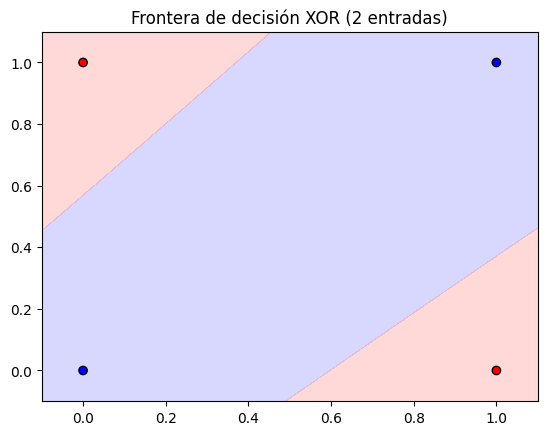

In [127]:
# Graficar frontera de decisión para XOR de 2 entradas
h = 0.01
x_min, x_max = X2[:,0].min() - 0.1, X2[:,0].max() + 0.1
y_min, y_max = X2[:,1].min() - 0.1, X2[:,1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = test2.predecir(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=[0,0.5,1], alpha=0.3, cmap="bwr")
plt.scatter(X2[:,0], X2[:,1], c=Y2[:,0], cmap="bwr", edgecolors="k")
plt.title("Frontera de decisión XOR (2 entradas)")
plt.show()


In [128]:
X4 = datos_XOR4[:, 0:4]
Y4 = ((datos_XOR4[:, 4] + 1) / 2).reshape(-1, 1)  # targets 0/1 para sigmoid

test4.entrenar(X4, Y4, lr=0.1, epochs=5000)

In [129]:
# Mostrar predicciones hard y soft para los 4 puntos de la XOR de 2 entradas
print("Entradas\tTarget\tSalida sigmoide\tPredicción (umbral 0.5)")
preds = test2.predecir(X2)
for x, y, p in zip(X2, Y2, preds):
    print(f"{x}\t{int(y[0])}\t{p[0]:.3f}\t\t{int(p[0]>=0.5)}")

Entradas	Target	Salida sigmoide	Predicción (umbral 0.5)
[0 0]	0	0.275		0
[0 1]	1	0.752		1
[1 0]	1	0.759		1
[1 1]	0	0.212		0


In [130]:
# Mostrar predicciones hard y soft para los 4 puntos de la XOR de 4 entradas
print("Entradas\tTarget\tSalida sigmoide\tPredicción (umbral 0.5)")
preds = test4.predecir(X4)
for x, y, p in zip(X4, Y4, preds):
    print(f"{x}\t{int(y[0])}\t{p[0]:.3f}\t\t{int(p[0]>=0.5)}")

Entradas	Target	Salida sigmoide	Predicción (umbral 0.5)
[-1 -1 -1 -1]	0	0.609		1
[ 1 -1 -1 -1]	1	0.624		1
[-1  1 -1 -1]	1	0.705		1
[ 1  1 -1 -1]	0	0.099		0
[-1 -1  1 -1]	1	0.786		1
[ 1 -1  1 -1]	0	0.126		0
[-1  1  1 -1]	0	0.174		0
[ 1  1  1 -1]	0	0.078		0
[-1 -1 -1  1]	1	0.577		1
[ 1 -1 -1  1]	0	0.178		0
[-1  1 -1  1]	0	0.099		0
[ 1  1 -1  1]	0	0.025		0
[-1 -1  1  1]	0	0.119		0
[ 1 -1  1  1]	0	0.047		0
[-1  1  1  1]	0	0.046		0
[1 1 1 1]	0	0.038		0
